In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#import all the libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestRegressor

In [3]:
#read the dataset
forest = pd.read_csv('drive/MyDrive/fire_archive.csv')
forest.head(10)

,latitude,longitude,brightness,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,1.0,2019-08-01,56,Terra,MODIS,48,6.3,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,1.0,2019-08-01,56,Terra,MODIS,71,6.3,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,1.7,2019-08-01,57,Terra,MODIS,42,6.3,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,1.1,2019-08-01,57,Terra,MODIS,33,6.3,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,1.9,2019-08-01,57,Terra,MODIS,36,6.3,298.8,27.6,D,0
5,-12.6191,142.1998,314.8,1.0,1.0,2019-08-01,57,Terra,MODIS,68,6.3,297.6,9.3,D,0
6,-14.3655,143.5682,305.4,1.2,1.1,2019-08-01,57,Terra,MODIS,24,6.3,283.9,5.9,D,0
7,-14.3195,143.5198,322.9,1.2,1.1,2019-08-01,57,Terra,MODIS,79,6.3,290.9,20.4,D,0
8,-13.1654,141.9715,317.2,1.0,1.0,2019-08-01,57,Terra,MODIS,72,6.3,300.0,9.9,D,0
9,-11.5473,132.6796,311.5,3.4,1.7,2019-08-01,57,Terra,MODIS,40,6.3,298.7,27.3,D,0


In [4]:
forest.shape

(36011, 15)

In [5]:
forest.isnull().sum()

latitude      0
longitude     0
brightness    0
scan          0
track         0
acq_date      0
acq_time      0
satellite     0
instrument    0
confidence    0
version       0
bright_t31    0
frp           0
daynight      0
type          0
dtype: int64

In [6]:
forest.describe()

,latitude,longitude,brightness,scan,track,acq_time,confidence,version,bright_t31,frp,type
count,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,36011.000000,3.601100e+04,36011.000000,36011.000000,36011.000000
mean,-19.100962,138.931446,328.750696,1.620905,1.215281,600.025798,67.551387,6.300000e+00,301.339138,51.132176,0.019439
std,7.265777,9.261400,18.992808,0.813764,0.247852,548.369111,23.179946,1.776382e-15,9.724462,92.280112,0.198326
min,-42.762800,114.104300,300.000000,1.000000,1.000000,0.000000,0.000000,6.300000e+00,267.000000,0.000000,0.000000
25%,-26.370250,131.072250,316.500000,1.100000,1.000000,205.000000,52.000000,6.300000e+00,293.600000,13.800000,0.000000
50%,-15.706500,136.738500,326.400000,1.300000,1.100000,424.000000,70.000000,6.300000e+00,302.400000,25.800000,0.000000
75%,-13.343600,147.477500,336.700000,1.900000,1.300000,600.000000,86.000000,6.300000e+00,308.600000,52.800000,0.000000
max,-10.072600,153.490400,504.400000,4.800000,2.000000,2359.000000,100.000000,6.300000e+00,400.100000,3679.500000,3.000000


<ipython-input-7-5e3171ac7d9a>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(forest.corr(),annot=True,cmap='viridis')


<Axes: >

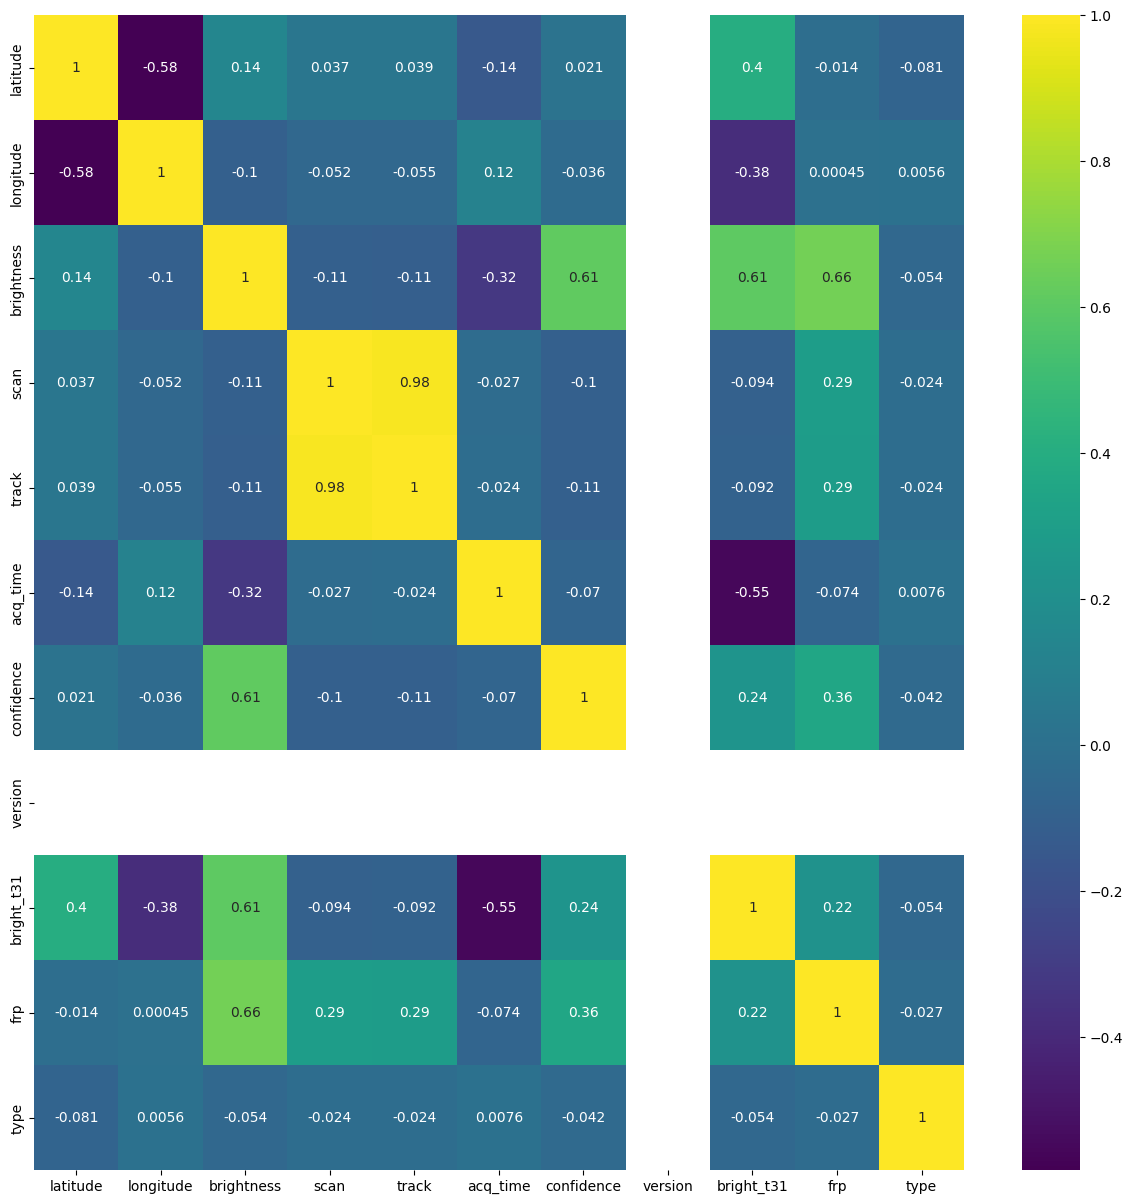

In [7]:
plt.figure(figsize=(15,15))
sns.heatmap(forest.corr(),annot=True,cmap='viridis')

In [8]:
forest = forest.drop(['track'], axis = 1)

### From the the dataset we are not finding if the forest fire happens or not, we are trying to find the confidence of the forest fire happening. They may seem to be the same thing but there is a very small difference between them.

In [9]:
# Finding categorical data
print("The scan column")
print(forest['scan'].value_counts())
print()
print("The aqc_time column")
print(forest['acq_time'].value_counts())
print()
print("The satellite column")
print(forest['satellite'].value_counts())
print()
print("The instrument column")
print(forest['instrument'].value_counts())
print()
print("The version column")
print(forest['version'].value_counts())
print()
print("The daynight column")
print(forest['daynight'].value_counts())

The scan column
1.0    8284
1.1    6000
1.2    3021
1.3    2412
1.4    1848
1.5    1610
1.6    1451
1.7    1281
1.8    1041
1.9     847
2.0     707
2.2     691
2.1     649
2.3     608
2.5     468
2.4     433
2.8     422
3.0     402
2.7     366
2.9     361
2.6     347
3.1     259
3.2     244
3.6     219
3.4     203
3.3     203
3.8     189
3.9     156
4.7     149
4.3     137
3.7     134
3.5     134
4.1     120
4.6     118
4.5     116
4.2     108
4.0     103
4.4     100
4.8      70
Name: scan, dtype: int64

The aqc_time column
506     851
454     631
122     612
423     574
448     563
       ... 
246       1
1549      1
1724      1
1629      1
302       1
Name: acq_time, Length: 662, dtype: int64

The satellite column
Aqua     20541
Terra    15470
Name: satellite, dtype: int64

The instrument column
MODIS    36011
Name: instrument, dtype: int64

The version column
6.3    36011
Name: version, dtype: int64

The daynight column
D    28203
N     7808
Name: daynight, dtype: int64


### From the above data we can see that some columns have just one value reccurring in them, meaning they are not valuable to us so we will drop them altogether.
### Thus only satellite and daynight column are the only categorical type.

In [10]:
forest = forest.drop(['instrument','version'], axis = 1)
forest.head(10)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,Terra,48,297.3,6.6,D,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,Terra,71,297.3,11.3,D,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,Terra,42,298.7,23.1,D,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,Terra,33,296.1,6.5,D,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,Terra,36,298.8,27.6,D,0
5,-12.6191,142.1998,314.8,1.0,2019-08-01,57,Terra,68,297.6,9.3,D,0
6,-14.3655,143.5682,305.4,1.2,2019-08-01,57,Terra,24,283.9,5.9,D,0
7,-14.3195,143.5198,322.9,1.2,2019-08-01,57,Terra,79,290.9,20.4,D,0
8,-13.1654,141.9715,317.2,1.0,2019-08-01,57,Terra,72,300.0,9.9,D,0
9,-11.5473,132.6796,311.5,3.4,2019-08-01,57,Terra,40,298.7,27.3,D,0


In [11]:
daynight_map = {"D": 1, "N": 0}
satellite_map = {"Terra": 1, "Aqua": 0}

forest['daynight'] = forest['daynight'].map(daynight_map)
forest['satellite'] = forest['satellite'].map(satellite_map)

forest.head(10)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,0
5,-12.6191,142.1998,314.8,1.0,2019-08-01,57,1,68,297.6,9.3,1,0
6,-14.3655,143.5682,305.4,1.2,2019-08-01,57,1,24,283.9,5.9,1,0
7,-14.3195,143.5198,322.9,1.2,2019-08-01,57,1,79,290.9,20.4,1,0
8,-13.1654,141.9715,317.2,1.0,2019-08-01,57,1,72,300.0,9.9,1,0
9,-11.5473,132.6796,311.5,3.4,2019-08-01,57,1,40,298.7,27.3,1,0


In [12]:
forest['type'].value_counts()

0    35666
2      335
3       10
Name: type, dtype: int64

In [13]:
types = pd.get_dummies(forest['type'])
forest = pd.concat([forest, types], axis=1)

forest = forest.drop(['type'], axis = 1)
forest.head(10)

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,0,2,3
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0
5,-12.6191,142.1998,314.8,1.0,2019-08-01,57,1,68,297.6,9.3,1,1,0,0
6,-14.3655,143.5682,305.4,1.2,2019-08-01,57,1,24,283.9,5.9,1,1,0,0
7,-14.3195,143.5198,322.9,1.2,2019-08-01,57,1,79,290.9,20.4,1,1,0,0
8,-13.1654,141.9715,317.2,1.0,2019-08-01,57,1,72,300.0,9.9,1,1,0,0
9,-11.5473,132.6796,311.5,3.4,2019-08-01,57,1,40,298.7,27.3,1,1,0,0


In [14]:
forest = forest.rename(columns={0: 'type_0', 2: 'type_2', 3: 'type_3'})

In [15]:
# We will be converting scan column to categorical type, we will be doing this using binning method.
# Range for this columns was 1 to 4.8

bins = [0, 1, 2, 3, 4, 5]
labels = [1,2,3,4,5]
forest['scan_binned'] = pd.cut(forest['scan'], bins=bins, labels=labels)

forest.head()

,latitude,longitude,brightness,scan,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned
0,-11.8070,142.0583,313.0,1.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1
1,-11.7924,142.0850,319.3,1.0,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1
2,-12.8398,132.8744,311.6,3.1,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4
3,-14.4306,143.3035,310.1,1.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2
4,-12.4953,131.4897,310.3,4.0,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4


In [16]:
forest['acq_date'] = pd.to_datetime(forest['acq_date'])

In [17]:
# We will drop scan column and handle date type data - we can extract useful information from these datatypes
forest = forest.drop(['scan'], axis = 1)

In [18]:
forest['year'] = forest['acq_date'].dt.year
forest.head(10)

,latitude,longitude,brightness,acq_date,acq_time,satellite,confidence,bright_t31,frp,daynight,type_0,type_2,type_3,scan_binned,year
0,-11.8070,142.0583,313.0,2019-08-01,56,1,48,297.3,6.6,1,1,0,0,1,2019
1,-11.7924,142.0850,319.3,2019-08-01,56,1,71,297.3,11.3,1,1,0,0,1,2019
2,-12.8398,132.8744,311.6,2019-08-01,57,1,42,298.7,23.1,1,1,0,0,4,2019
3,-14.4306,143.3035,310.1,2019-08-01,57,1,33,296.1,6.5,1,1,0,0,2,2019
4,-12.4953,131.4897,310.3,2019-08-01,57,1,36,298.8,27.6,1,1,0,0,4,2019
5,-12.6191,142.1998,314.8,2019-08-01,57,1,68,297.6,9.3,1,1,0,0,1,2019
6,-14.3655,143.5682,305.4,2019-08-01,57,1,24,283.9,5.9,1,1,0,0,2,2019
7,-14.3195,143.5198,322.9,2019-08-01,57,1,79,290.9,20.4,1,1,0,0,2,2019
8,-13.1654,141.9715,317.2,2019-08-01,57,1,72,300.0,9.9,1,1,0,0,1,2019
9,-11.5473,132.6796,311.5,2019-08-01,57,1,40,298.7,27.3,1,1,0,0,4,2019


In [19]:
forest['month'] = forest['acq_date'].dt.month
forest['day'] = forest['acq_date'].dt.day

In [20]:
forest.shape

(36011, 17)

In [21]:
y = forest['confidence']
fin = forest.drop(['confidence', 'acq_date', 'acq_time', 'bright_t31', 'type_0'], axis = 1)

<ipython-input-22-c2c9fa4af286>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)


<Axes: >

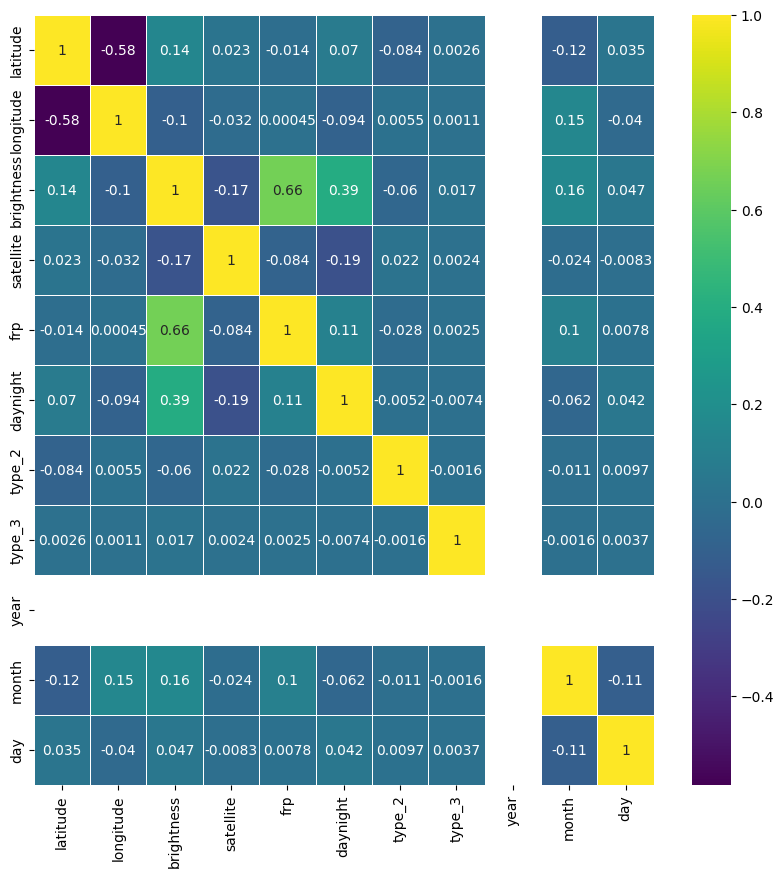

In [22]:
plt.figure(figsize=(10, 10))
sns.heatmap(fin.corr(),annot=True,cmap='viridis',linewidths=.5)

In [23]:
fin.head(10)

,latitude,longitude,brightness,satellite,frp,daynight,type_2,type_3,scan_binned,year,month,day
0,-11.8070,142.0583,313.0,1,6.6,1,0,0,1,2019,8,1
1,-11.7924,142.0850,319.3,1,11.3,1,0,0,1,2019,8,1
2,-12.8398,132.8744,311.6,1,23.1,1,0,0,4,2019,8,1
3,-14.4306,143.3035,310.1,1,6.5,1,0,0,2,2019,8,1
4,-12.4953,131.4897,310.3,1,27.6,1,0,0,4,2019,8,1
5,-12.6191,142.1998,314.8,1,9.3,1,0,0,1,2019,8,1
6,-14.3655,143.5682,305.4,1,5.9,1,0,0,2,2019,8,1
7,-14.3195,143.5198,322.9,1,20.4,1,0,0,2,2019,8,1
8,-13.1654,141.9715,317.2,1,9.9,1,0,0,1,2019,8,1
9,-11.5473,132.6796,311.5,1,27.3,1,0,0,4,2019,8,1


In [24]:
Xtrain, Xtest, ytrain, ytest = train_test_split(fin.iloc[:, :1000], y, test_size=0.2)

In [25]:
model = RandomForestRegressor(n_estimators=500, random_state = 42, n_jobs = -1)

In [26]:
model.fit(Xtrain, ytrain)
y_pred = model.predict(Xtest)

#Checking the accuracy
model_accuracy = round(model.score(Xtrain,ytrain)*100,2)
print(round(model_accuracy,2),'%')

95.32 %


In [27]:
#Checking the accuracy
model_accuracy1 = round(model.score(Xtest, ytest)*100,2)
print(round(model_accuracy1,2),'%')

66.29 %


## The accuracy is not so great and is overfitting so we will be doing hyperparameter tuning using RandomCV

In [28]:
model.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': -1,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

In [29]:
from sklearn.model_selection import RandomizedSearchCV

In [30]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 300, stop = 500, num = 20)]

# Number of features to consider at every split
max_features = ['auto', 'sqrt']

# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(15, 35, num = 7)]
max_depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2, 3, 5]

# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
                }
print(random_grid)

{'n_estimators': [300, 310, 321, 331, 342, 352, 363, 373, 384, 394, 405, 415, 426, 436, 447, 457, 468, 478, 489, 500], 'max_features': ['auto', 'sqrt'], 'max_depth': [15, 18, 21, 25, 28, 31, 35, None], 'min_samples_split': [2, 3, 5], 'min_samples_leaf': [1, 2, 4]}


In [ ]:
rf_random = RandomizedSearchCV(estimator = model, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42)
# Fit the random search model
rf_random.fit(Xtrain, ytrain)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  39.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=415; total time=  32.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  43.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  41.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  42.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  15.1s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  15.6s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=478; total time=  15.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=310; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=310; total time=  26.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=310; total time=  23.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=447; total time=  40.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=447; total time=  41.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=447; total time=  42.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=457; total time=  35.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=457; total time=  34.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=457; total time=  33.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=384; total time=  32.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=384; total time=  32.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=384; total time=  37.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=426; total time=  35.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=426; total time=  34.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=426; total time=  36.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=352; total time=   8.8s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=352; total time=  10.1s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=352; total time=  10.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  28.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=300; total time=  28.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=447; total time=  11.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=447; total time=  10.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=447; total time=  12.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=373; total time=  12.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=373; total time=  12.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=373; total time=  12.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=384; total time=  31.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=384; total time=  32.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=384; total time=  34.7s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=300; total time=   8.0s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=300; total time=   6.0s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=300; total time=   8.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=478; total time=  39.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=478; total time=  37.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=3, n_estimators=478; total time=  39.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=  25.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=  26.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=  26.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=489; total time=  35.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=489; total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=489; total time=  34.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  12.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  12.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=500; total time=  14.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=415; total time=   8.3s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=415; total time=   9.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=415; total time=   9.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  37.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  39.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  40.2s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=426; total time=  11.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=426; total time=  10.9s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=426; total time=  12.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=310; total time=  26.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=310; total time=  21.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=310; total time=  22.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=394; total time=  12.9s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=394; total time=  12.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=394; total time=  12.9s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  13.7s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  13.8s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  13.7s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=489; total time=  11.4s
[CV] END max_depth=28, max_features=sqrt

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=478; total time=  40.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=478; total time=  38.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=478; total time=  38.7s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=321; total time=  10.1s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=321; total time=   8.5s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=321; total time=  10.2s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=405; total time=  10.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=405; total time=   9.7s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=405; total time=   9.8s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=426; total time=  10.1s
[CV] END max_depth=28, max_features=sqrt

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=447; total time=  37.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=447; total time=  35.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=447; total time=  34.1s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=394; total time=   9.5s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=394; total time=   8.2s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=394; total time=   9.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  24.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  24.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  23.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=426; total time=  14.3s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=426; total time=  13.0s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=426; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=373; total time=  30.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=373; total time=  31.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=373; total time=  30.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=426; total time=  29.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=426; total time=  29.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=426; total time=  33.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=478; total time=  32.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=478; total time=  34.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=478; total time=  33.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  35.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  34.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=500; total time=  37.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  23.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  21.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  23.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=457; total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=457; total time=  35.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=457; total time=  38.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=415; total time=  11.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=415; total time=   9.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=415; total time=  11.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=394; total time=  27.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=394; total time=  27.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=394; total time=  28.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=426; total time=  37.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=426; total time=  38.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=426; total time=  35.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=   8.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=   8.8s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=   7.2s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=405; total time=  12.4s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=405; total time=  12.3s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=1, min_samples_split=3, n_estimators=405; total time=  12.4s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=352; total time=   7.7s
[CV] END max_depth=25, max_features=sqrt

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=  29.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=  32.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=331; total time=  30.0s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=   9.8s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=  10.1s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=468; total time=  11.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time=  32.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time=  33.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time=  32.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=436; total time=  33.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=436; total time=  30.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=436; total time=  30.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=405; total time=  33.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=405; total time=  32.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=405; total time=  33.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=373; total time=  25.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=373; total time=  28.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=373; total time=  26.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=363; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=363; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=4, min_samples_split=3, n_estimators=363; total time=  25.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  14.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  14.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=436; total time=  14.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=373; total time=  10.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=373; total time=   9.5s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=373; total time=   9.2s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=415; total time=  14.5s
[CV] END max_depth=21, max_f

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  36.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  36.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  38.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=468; total time=  39.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=468; total time=  38.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=468; total time=  38.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=405; total time=   9.6s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=405; total time=  10.7s
[CV] END max_depth=25, max_features=sqrt, min_samples_leaf=2, min_samples_split=5, n_estimators=405; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=373; total time=  31.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=373; total time=  29.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=373; total time=  29.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=310; total time=  26.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=310; total time=  26.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=310; total time=  26.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=321; total time=  21.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=321; total time=  20.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=321; total time=  21.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=  27.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=  23.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=310; total time=  24.7s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=489; total time=  12.8s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=489; total time=  12.9s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=489; total time=  13.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=426; total time=  33.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=426; total time=  33.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=426; total time=  32.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=352; total time=   8.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=352; total time=   9.7s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=352; total time=   7.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=394; total time=  30.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=394; total time=  31.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=394; total time=  30.5s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=468; total time=  11.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=468; total time=  11.2s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=468; total time=  10.3s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=405; total time=   9.7s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=405; total time=   9.5s
[CV] END max_depth=31, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=405; total time=   8.0s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=352; total time=   8.6s
[CV] END max_depth=None, max_features=

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  38.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  37.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  38.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=468; total time=  37.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=468; total time=  34.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=468; total time=  36.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   8.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   7.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=300; total time=   8.6s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=489; total time=  12.8s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=489; total time=  12.4s
[CV] END max_depth=21, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=489; total time=  11.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  39.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  39.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=457; total time=  41.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=436; total time=  33.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=436; total time=  32.2s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=18, max_features=auto, min_samples_leaf=2, min_samples_split=2, n_estimators=436; total time=  33.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time=   9.6s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time=  10.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=4, min_samples_split=5, n_estimators=468; total time=  10.9s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=394; total time=  11.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=394; total time=   9.8s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=5, n_estimators=394; total time=  10.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=489; total time=  33.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=489; total time=  32.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=15, max_features=auto, min_samples_leaf=4, min_samples_split=5, n_estimators=489; total time=  31.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=373; total time=  33.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=373; total time=  31.5s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=373; total time=  31.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=363; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=363; total time=  25.6s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=35, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=363; total time=  27.6s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=342; total time=   7.4s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=342; total time=   6.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=342; total time=   8.0s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=352; total time=  28.1s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=352; total time=  28.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=21, max_features=auto, min_samples_leaf=1, min_samples_split=5, n_estimators=352; total time=  28.4s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=384; total time=  32.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=384; total time=  33.9s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=28, max_features=auto, min_samples_leaf=1, min_samples_split=3, n_estimators=384; total time=  32.6s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=478; total time=  13.2s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=478; total time=  13.6s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=478; total time=  12.6s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=457; total time=  10.5s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=457; total time=   9.9s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=4, min_samples_split=3, n_estimators=457; total time=   9.2s
[CV] END max_depth=35, max_features=sqrt, min_samples_leaf=2, min_samples_split=2, n_estimators=468; total time=  12.4s
[CV] END max_depth=35, max_features=sqrt

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  38.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  37.7s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=31, max_features=auto, min_samples_leaf=2, min_samples_split=5, n_estimators=489; total time=  37.3s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=447; total time=  12.8s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=447; total time=  14.4s
[CV] END max_depth=18, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=447; total time=  12.8s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  24.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  24.3s


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


[CV] END max_depth=25, max_features=auto, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=  24.5s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=   6.7s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=   8.4s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=4, min_samples_split=2, n_estimators=342; total time=   6.7s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=405; total time=  11.0s
[CV] END max_depth=28, max_features=sqrt, min_samples_leaf=2, min_samples_split=3, n_estimators=405; total time=  10.9s


In [40]:
rf_random.best_params_

{'n_estimators': 394,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [42]:
random_new = RandomForestRegressor(n_estimators = 394, min_samples_split = 2, min_samples_leaf = 1, max_features = 'sqrt',
                                      max_depth = 25, bootstrap = True)

In [43]:
random_new.fit(Xtrain, ytrain)
y_pred1 = random_new.predict(Xtest)

#Checking the accuracy
random_model_accuracy1 = round(random_new.score(Xtrain, ytrain)*100,2)
print(round(random_model_accuracy1, 2),'%')

95.28 %


In [44]:
#Checking the accuracy
random_model_accuracy2 = round(random_new.score(Xtest, ytest)*100,2)
print(round(random_model_accuracy2, 2),'%')

68.16 %
